In [1]:
import numpy as np

In [3]:
import tensorflow as tf

class MLPs():
    def __init__(self, num_inputs, num_outputs, lr, num_hidden ):
        self.lr = lr
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_outputs = num_outputs
        self.W1 =  np.random.rand(num_hidden, num_inputs) - 0.5
        self.b1 =  np.random.rand(num_hidden, 1) - 0.5
        self.W2 =  np.random.rand(num_outputs, num_hidden) - 0.5
        self.b2 =  np.random.rand(num_outputs, 1) - 0.5
        self.m = 0

    def softmax(self, Z):
        return tf.nn.softmax(Z, axis=0).numpy()

    def ReLU(self, Z):
        return np.maximum(Z, 0)

    def ReLU_deriv(self, Z):
        return  Z>0

    def forward_prop(self, X):
        self.m, n= X.shape
        if n == self.num_inputs :
            X = X.T

        X.reshape(self.num_inputs, -1)
        Z1 = self.W1.dot(X) + self.b1
        A1 = self.ReLU(Z1)
        Z2 = self.W2.dot(A1) + self.b2
        A2 = self.softmax(Z2)
        return A1, A2

    def one_hot(self, Y):
        one_hot_y = np.zeros((Y.size , Y.max() + 1))
        one_hot_y[np.arange(Y.size) ,Y] = 1
        one_hot_y =  one_hot_y.T
        return one_hot_y

    def backward_prop(self, A1, A2, X, Y):
        one_hot_Y = self.one_hot(Y)
        dZ2 = A2 - one_hot_Y
        dW2 = 1 / self.m * dZ2.dot(A1.T)
        db2 = 1 / self.m * sum(dZ2.T)
        dZ1 = self.W2.T.dot(dZ2) * (A1>0)
        dW1 = 1 / self.m * dZ1.dot(X.T)
        db1 = 1 / self.m * sum(dZ1.T)
        db1.shape, db2.shape = (self.num_hidden,-1), (self.num_outputs, -1)
        return dW1, db1, dW2, db2

    def update_params(self, dW1, db1, dW2, db2):
        self.W1 = self.W1 - self.lr * dW1
        self.b1 = self.b1 - self.lr * db1
        self.W2 = self.W2 - self.lr * dW2
        self.b2 = self.b2 - self.lr * db2

    def predict(self, X):
        _, A = self.forward_prop(X)
        return np.argmax(A, 0)

    def score(self, X, Y):
        prediction = self.predict(X)
        return sum(prediction == Y)/ Y.size

    def init_params(self, X, Y):
        self.num_outputs, _ = self.one_hot(Y).shape
        temp2, temp4 = X.shape


    def fit(self, X, Y, iterations):
        self.m, n= X.shape
        if n == self.num_inputs :
            X = X.T

        for i in range(iterations):
            A1, A2 = self.forward_prop(X)
            dW1, db1, dW2, db2 = self.backward_prop(A1, A2, X, Y)
            self.update_params(dW1, db1, dW2, db2)
            if i  == iterations - 1:
                print(self.score(X, Y))

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [13]:
data = load_digits()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size =0.1, random_state=123)

In [14]:
mlp = MLPs(64, 10 ,0.001, 400)

In [15]:
mlp.fit(X_train, y_train, 1000)

1.0


In [16]:
mlp.score(X_test, y_test)

0.9444444444444444

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
some_data = X_test[6 ,:].reshape(8, 8)

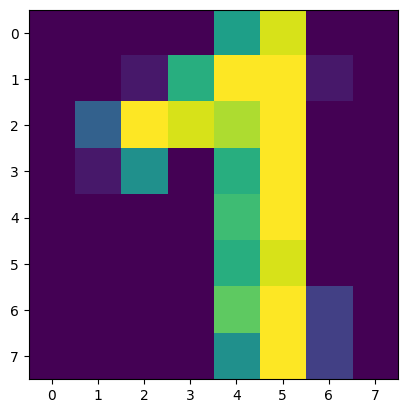

In [ ]:
plt.imshow(some_data)